# Titulación

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importamos el archivo con los volúmenes medidos al titular
data = pd.read_csv("data.csv")

data

,Date,Volume,#1,#2,#3,#4
0,2021-11-03,V1,9.7,7.30,9.1,8.2
1,2021-11-03,V2,10.3,7.70,9.7,9.0
2,2021-11-04,V1,9.7,7.10,9.2,8.1
3,2021-11-04,V2,10.4,7.70,10.0,9.0
4,2021-11-05,V1,9.7,7.40,9.0,8.0
5,2021-11-05,V2,10.9,8.20,10.3,9.5
6,2021-11-06,V1,9.3,7.25,8.7,8.0
7,2021-11-06,V2,10.7,8.30,10.6,9.6
8,2021-11-08,V1,8.1,6.80,6.5,6.9
9,2021-11-08,V2,11.2,8.30,11.0,9.4


In [3]:
# Definimos las listas con V1 (Volumen de HCl para que el NaOH con fenolftaleína pase de rosa a transparente)
V1_1 = np.asarray(data["#1"].tolist()[::2])
V1_2 = np.asarray(data["#2"].tolist()[::2])
V1_3 = np.asarray(data["#3"].tolist()[::2])
V1_4 = np.asarray(data["#4"].tolist()[::2])

# Definimos las listas con V2 (Volumen agregado de HCl para que el NaOH con fenolftaleína y naranja de metilo pase de naranja a rojo)
V2_1 = np.asarray(data["#1"].tolist()[1::2])
V2_2 = np.asarray(data["#2"].tolist()[1::2])
V2_3 = np.asarray(data["#3"].tolist()[1::2])
V2_4 = np.asarray(data["#4"].tolist()[1::2])

In [4]:
# Calculamos las diferencias de volumen que representan al CO2 atrapado en el NaOH
DV_1 = V2_1 - V1_1 
DV_2 = V2_2 - V1_2
DV_3 = V2_3 - V1_3
DV_4 = V2_4 - V1_4

In [5]:
#Le restamos el primer valor, dado que el NaOH ya estaba siendo usado
DV_1 = DV_1 - DV_1[0]
DV_2 = DV_2 - DV_2[0]
DV_3 = DV_3 - DV_3[0]
DV_4 = DV_4 - DV_4[0]

In [6]:
# Armamos un array con las fechas para poder graficar
dates = np.asarray(data["Date"].tolist()[::2])

dates

array(['2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
       '2021-11-08'], dtype='<U10')

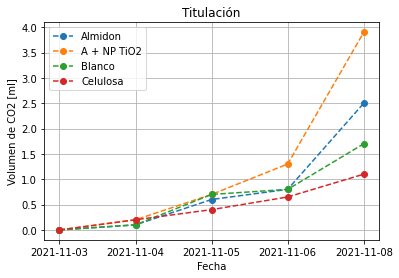

In [7]:
# Graficamos
plt.figure("Titulación")
plt.title("Titulación")
plt.plot(dates, DV_1, "o--", label="Almidon")
plt.plot(dates, DV_3, "o--", label="A + NP TiO2")
plt.plot(dates, DV_4, "o--", label="Blanco")
plt.plot(dates, DV_2, "o--", label="Celulosa")
plt.grid()
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Volumen de CO2 [ml]")
plt.savefig("Titulacion-mL.png")
plt.show()

Formula: 

$g=\frac{V C_{HCl}}{V_{muestra}} V_{frasco}44g/mol$

$g=\frac{V 0.4545}{5mL} 0.5L 44g/mol$

con V el volumen de la segunda reaccion

In [8]:
def gramos(x):#meter el volumen de la diferencia
    return x*0.4545*0.5*44/5

gramos1=np.array(gramos(DV_1))
gramos2=np.array(gramos(DV_2))
gramos3=np.array(gramos(DV_3))
gramos4=np.array(gramos(DV_4))

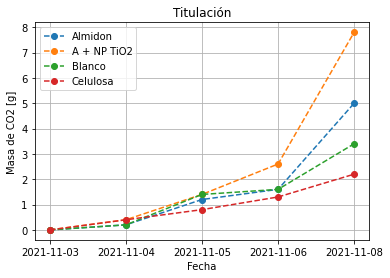

In [10]:
# Graficamos
plt.figure("Titulación")
plt.title("Titulación")
plt.plot(dates, gramos1, "o--", label="Almidon")
plt.plot(dates, gramos3, "o--", label="A + NP TiO2")
plt.plot(dates, gramos4, "o--", label="Blanco")
plt.plot(dates, gramos2, "o--", label="Celulosa")
plt.grid()
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Masa de CO2 [g]")
plt.savefig("Titulacion-g.png")
plt.show()